In [1]:
import pandas as pd
import requests
from sqlalchemy import create_engine
import time
import pymysql

In [2]:
# MySQL database connection
db_user = "root"
db_password = "Saurabh1042"
db_host = "localhost"
db_port = "3306"
db_name = "weather_data"
table_name = "weather"

In [3]:
# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

In [4]:
# Cities / districts list
cities = [
    "Sultanpur", "Lucknow", "Kanpur", "Varanasi", "Allahabad",
    "Surat", "Mumbai", "Bangalore", "Chennai", "Kolkata",
    "Nagpur", "Hyderabad", "Bhopal", "Indore", "Jabalpur",
    "Ujjain", "Gwalior", "Raipur", "Bilaspur", "Jalandhar",
    "Jodhpur", "Patiala", "Ludhiana", "Nainital", "Shimla",
    "Srinagar", "Gangtok", "Kathmandu", "Pokhara", "Ranchi",
    "Bhavnagar", "Ahmedabad", "Vadodara", "Jamnagar", "Nadiad",
    "Anand", "Rajkot", "Bhiwani", "Moradabad", "Gandhinagar",
    "Rajasthan", "Gurugram", "Noida", "Faridabad", "Saharanpur",
    "Sikar", "Udaipur", "Jaipur", "Kota", "Bikaner", "Rohtak",
    "Patna", "Prayagraj", "Ayodhya", "Madhubani","New Delhi",
    "Washington D.C.","London","Ottawa","Canberra","Berlin",
    "Paris","Rome","Tokyo","Beijing","Moscow","Brasília","Pretoria",
    "Cairo","Mexico City","Buenos Aires","Riyadh","Ankara","Jakarta",
    "Kathmandu","Sri Jayawardenepura Kotte","Islamabad","Dhaka","Singapore",
    "Abu Dhabi","Kuala Lumpur","Bangkok","Seoul","Hanoi","Baghdad","Tehran",
    "Damascus","Riyadh","Doha","Muscat","Manama","Amman","Beirut","Minsk",
    "Warsaw","Prague","Vienna","Brussels","Amsterdam","Oslo","Stockholm",
    "Helsinki","Copenhagen","Lisbon","Athens","Budapest","Sofia","Belgrade"

]

In [5]:
# API key
api_key = "8d00bcea26774a26bdd122850251708"

In [6]:
# Function to fetch weather data
def fetch_weather():
    weather_list = []
    for city in cities:
        url = f"https://api.weatherapi.com/v1/current.json?key={api_key}&q={city}"
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                weather_info = {
                    "city": data["location"]["name"],
                    "region": data["location"]["region"],
                    "country": data["location"]["country"],
                    "tz_id": data["location"]["tz_id"],
                    "local_time": data["location"]["localtime"],
                    "temp_c": data["current"]["temp_c"],
                    "condition": data["current"]["condition"]["text"],
                    "wind_kph": data["current"]["wind_kph"]
                }
                weather_list.append(weather_info)
            else:
                print(f"Failed for {city}: {response.status_code}")
        except Exception as e:
            print(f"Error for {city}: {e}")
        time.sleep(1)  # Respect API rate limit
    
    return pd.DataFrame(weather_list)

In [7]:
# Fetch and save weather data to a CSV file
weather_df = fetch_weather()
weather_df.to_csv("weather_data.csv", index=False)

Failed for Nainital: 400
Failed for Gurugram: 400
Failed for Prayagraj: 400


In [8]:
 # Update MySQL table with latest weather data from fetched data frame
def update_mysql(df):
    # Replace table with new data
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)
    print(f"MySQL table '{table_name}' updated with latest weather data.")

In [9]:
if __name__ == "__main__":
        print("Fetching weather data...")
        weather_df = fetch_weather()
        update_mysql(weather_df)
        weather_df.to_csv("weather_data.csv", index=False)

Fetching weather data...
Failed for Nainital: 400
Failed for Gurugram: 400
Failed for Prayagraj: 400
MySQL table 'weather' updated with latest weather data.


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
# visualizations

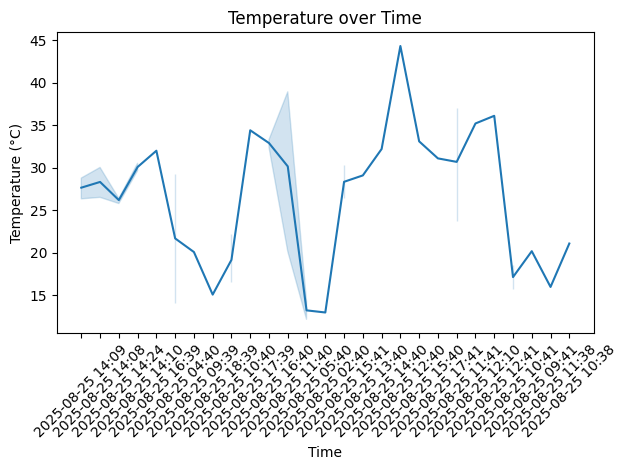

In [14]:
# Temperature over time
sns.lineplot(data=weather_df, x='local_time', y='temp_c')
plt.title('Temperature over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

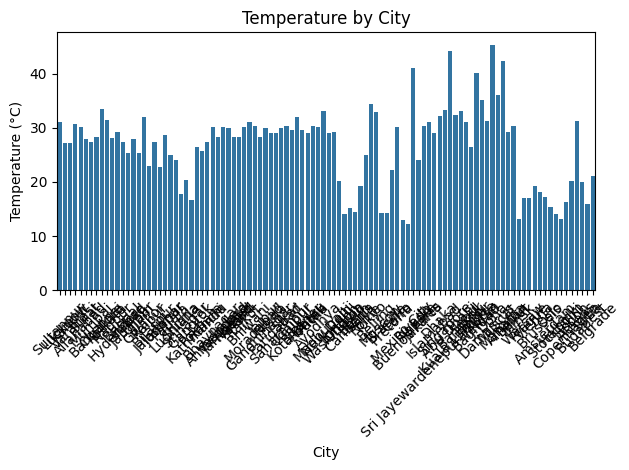

In [18]:
# Temperature by City
sns.barplot(data=weather_df, x='city', y='temp_c')
plt.title('Temperature by City')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

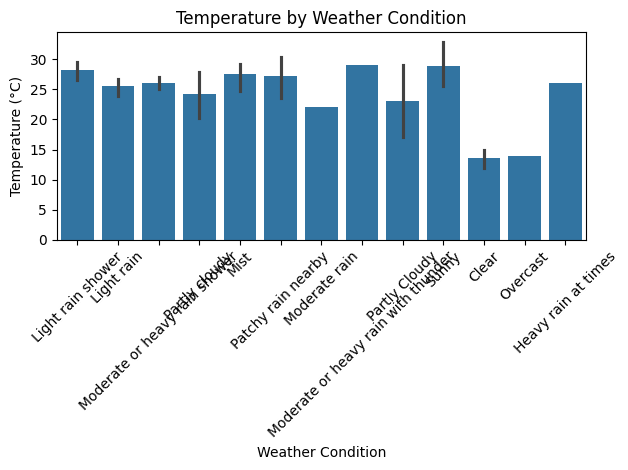

In [28]:
# Temperature by Weather Condition
sns.barplot(data=weather_df, x='condition', y='temp_c')
plt.title('Temperature by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
weather_df.describe()

,temp_c,wind_kph
count,105.000000,105.000000
mean,26.580952,14.923810
std,7.218807,7.376359
min,12.000000,3.600000
25%,22.000000,9.000000
50%,28.000000,13.700000
75%,30.000000,19.800000
max,45.000000,34.200000


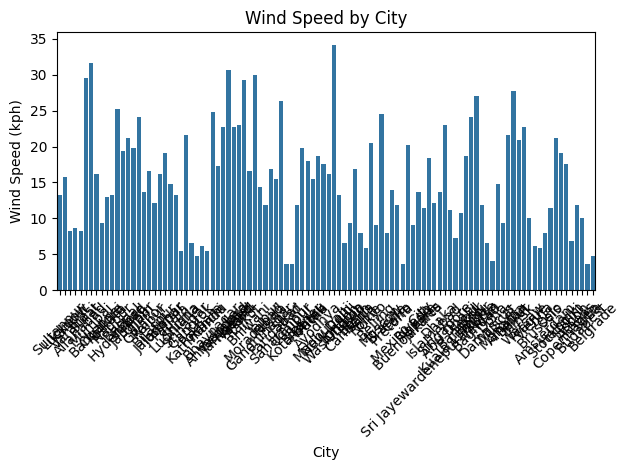

In [31]:
# Wind speed by city
sns.barplot(data=weather_df, x='city', y='wind_kph')
plt.title('Wind Speed by City')
plt.xlabel('City')
plt.ylabel('Wind Speed (kph)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

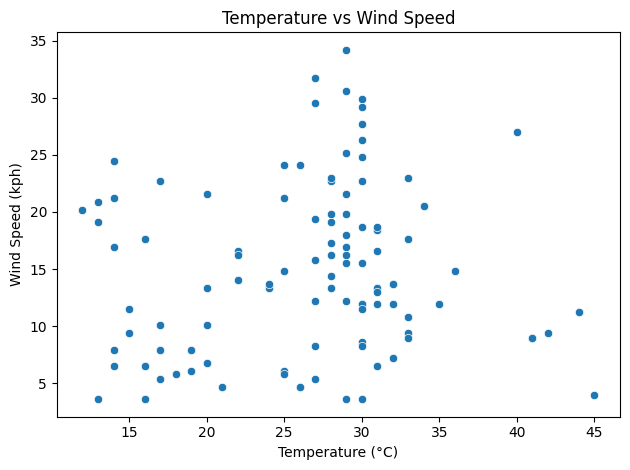

In [33]:
# Temperature vs Wind Speed
sns.scatterplot(data=weather_df, x='temp_c', y='wind_kph')
plt.title('Temperature vs Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (kph)')
plt.tight_layout()
plt.show()


In [36]:
# Descriptive statistics for numeric columns
numeric_weather_df = weather_df.select_dtypes(include='number')
numeric_weather_df

,temp_c,wind_kph
0,31,13.3
1,27,15.8
2,27,8.3
3,30,8.6
4,30,8.3
...,...,...
100,20,6.8
101,31,11.9
102,20,10.1
103,16,3.6


In [39]:
descriptive_stats = numeric_weather_df.describe()
descriptive_stats

,temp_c,wind_kph
count,105.000000,105.000000
mean,26.580952,14.923810
std,7.218807,7.376359
min,12.000000,3.600000
25%,22.000000,9.000000
50%,28.000000,13.700000
75%,30.000000,19.800000
max,45.000000,34.200000


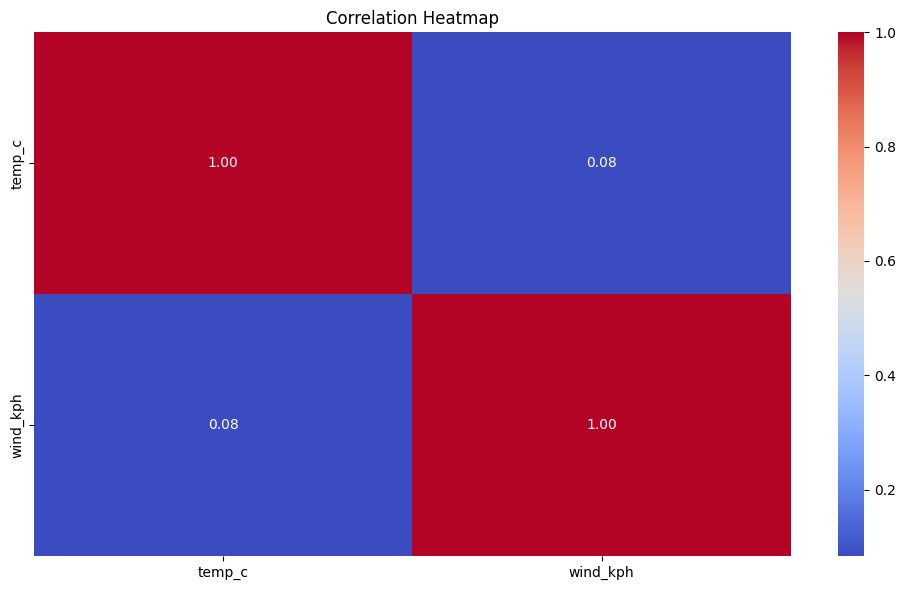

In [40]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_weather_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [42]:
# Correlation analysis
correlation = numeric_weather_df.corr()
correlation

,temp_c,wind_kph
temp_c,1.000000,0.083489
wind_kph,0.083489,1.000000


In [43]:
# Group by local_time and calculate mean temperature
temperature_trends = weather_df.groupby('local_time')['temp_c'].mean().reset_index()
temperature_trends 

,local_time,temp_c
0,2025-08-25 02:40,13.000000
1,2025-08-25 04:40,21.500000
2,2025-08-25 05:40,13.000000
3,2025-08-25 09:39,20.000000
4,2025-08-25 09:41,20.000000
5,2025-08-25 10:38,21.000000
6,2025-08-25 10:40,19.000000
7,2025-08-25 10:41,17.000000
8,2025-08-25 11:38,16.000000
9,2025-08-25 11:40,30.000000


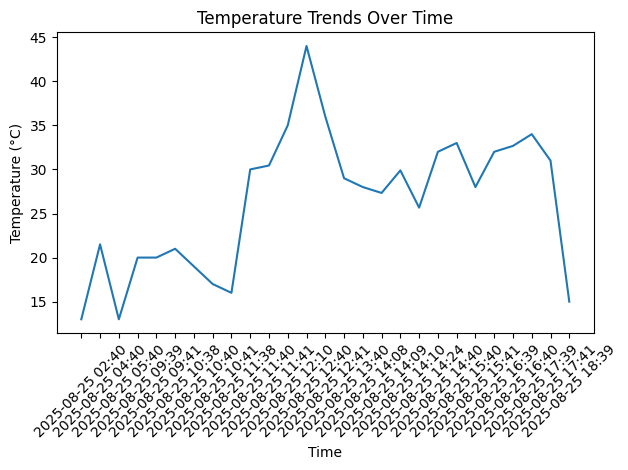

In [44]:

# Visualize temperature trends over time
sns.lineplot(data=temperature_trends, x='local_time', y='temp_c')
plt.title('Temperature Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

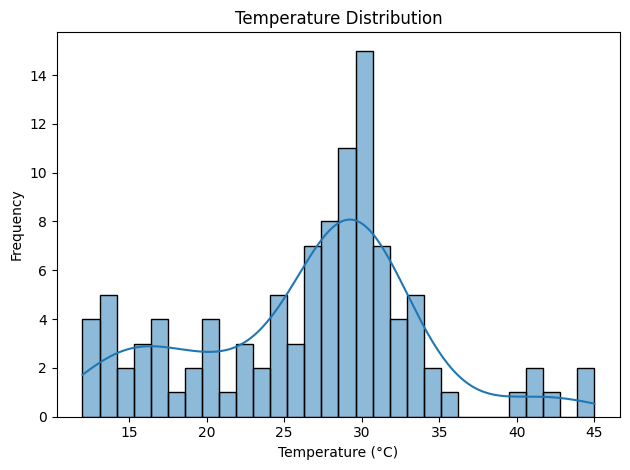

In [45]:
# Analyze temperature distribution
sns.histplot(data=weather_df, x='temp_c', bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency') 
plt.tight_layout()
plt.show()
